In [ ]:
#import some useful modules
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Connect my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
A1_data = pd.read_excel('/content/drive/MyDrive/INF 2178/INF2178_A1_data.xlsx', sheet_name=0) #load the data, except the explanation sheet
A1_data.head()

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0


In [ ]:
#Adding a new column called "Occupancy Rate" based on it is room based or bed based, and display the result
A1_data['OCCUPANCY_RATE'] = np.where(A1_data['CAPACITY_TYPE'] == 'Room Based Capacity', 100*(A1_data['OCCUPIED_ROOMS']/A1_data['CAPACITY_ACTUAL_ROOM']) , None)
A1_data['OCCUPANCY_RATE'] = np.where(A1_data['CAPACITY_TYPE'] == 'Bed Based Capacity', 100*(A1_data['OCCUPIED_BEDS']/A1_data['CAPACITY_ACTUAL_BED']), A1_data['OCCUPANCY_RATE'])
A1_data

,OCCUPANCY_DATE,ORGANIZATION_NAME,PROGRAM_ID,PROGRAM_NAME,SECTOR,PROGRAM_MODEL,OVERNIGHT_SERVICE_TYPE,PROGRAM_AREA,SERVICE_USER_COUNT,CAPACITY_TYPE,CAPACITY_ACTUAL_BED,OCCUPIED_BEDS,CAPACITY_ACTUAL_ROOM,OCCUPIED_ROOMS,OCCUPANCY_RATE
0,2021-01-01,COSTI Immigrant Services,15371,COSTI North York West Hotel - Family Program,Families,Emergency,Motel/Hotel Shelter,COVID-19 Response,74,Room Based Capacity,NaN,NaN,29.0,26.0,89.655172
1,2021-01-01,COSTI Immigrant Services,16211,COSTI North York West Hotel - Seniors Program,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,3,Room Based Capacity,NaN,NaN,3.0,3.0,100.0
2,2021-01-01,COSTI Immigrant Services,16192,COSTI North York West Hotel Program - Men,Men,Emergency,Motel/Hotel Shelter,COVID-19 Response,24,Room Based Capacity,NaN,NaN,28.0,23.0,82.142857
3,2021-01-01,COSTI Immigrant Services,16191,COSTI North York West Hotel Program - Mixed Adult,Mixed Adult,Emergency,Motel/Hotel Shelter,COVID-19 Response,25,Room Based Capacity,NaN,NaN,17.0,17.0,100.0
4,2021-01-01,COSTI Immigrant Services,16193,COSTI North York West Hotel Program - Women,Women,Emergency,Motel/Hotel Shelter,COVID-19 Response,13,Room Based Capacity,NaN,NaN,14.0,13.0,92.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50939,2021-12-31,YWCA Toronto,14671,YWCA Davenport - Youth,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,6,Bed Based Capacity,20.0,6.0,NaN,NaN,30.0
50940,2021-12-31,Youth Without Shelter,12292,Youth without Shelter Emergency Shelter Program,Youth,Emergency,Shelter,Base Shelter and Overnight Services System,23,Bed Based Capacity,23.0,23.0,NaN,NaN,100.0
50941,2021-12-31,Youth Without Shelter,12291,Youth without Shelter Stay In School Program,Youth,Transitional,Shelter,Base Shelter and Overnight Services System,13,Bed Based Capacity,14.0,13.0,NaN,NaN,92.857143
50942,2021-12-31,YouthLink,14891,YouthLink Emergency Program,Mixed Adult,Emergency,Shelter,Base Shelter and Overnight Services System,10,Bed Based Capacity,10.0,10.0,NaN,NaN,100.0


In [ ]:
# Create two dataframe for later use
bed_based_capacity_data = A1_data[A1_data['CAPACITY_TYPE'] == 'Bed Based Capacity']
room_based_capacity_data = A1_data[A1_data['CAPACITY_TYPE'] == 'Room Based Capacity']

In [ ]:
#define a function to get summary statistics
def get_summary_statistics(dataset):

    mean = np.round(np.mean(dataset), 2)
    median = np.round(np.median(dataset), 2)
    min_value = np.round(dataset.min(), 2)
    max_value = np.round(dataset.max(), 2)
    quartile_1 = np.round(dataset.quantile(0.25), 2)
    quartile_3 = np.round(dataset.quantile(0.75), 2)

    # Interquartile range
    iqr = np.round(quartile_3 - quartile_1, 2)

    print('Min: %s' % min_value)
    print('Mean: %s' % mean)
    print('Max: %s' % max_value)
    print('25th percentile: %s' % quartile_1)
    print('Median: %s' % median)
    print('75th percentile: %s' % quartile_3)
    print('Interquartile range (IQR): %s' % iqr)

In [ ]:
#get summary statistics for occupancy rate
print('Occupancy rate summary statistics\n\n')
get_summary_statistics(A1_data['OCCUPANCY_RATE'])
print('\n\nOccupancy rate summary statistics')

Occupancy rate summary statistics


Min: 1.2
Mean: 93.01
Max: 101.41
25th percentile: 92.31
Median: 100.0
75th percentile: 100.0
Interquartile range (IQR): 7.69


Occupancy rate summary statistics


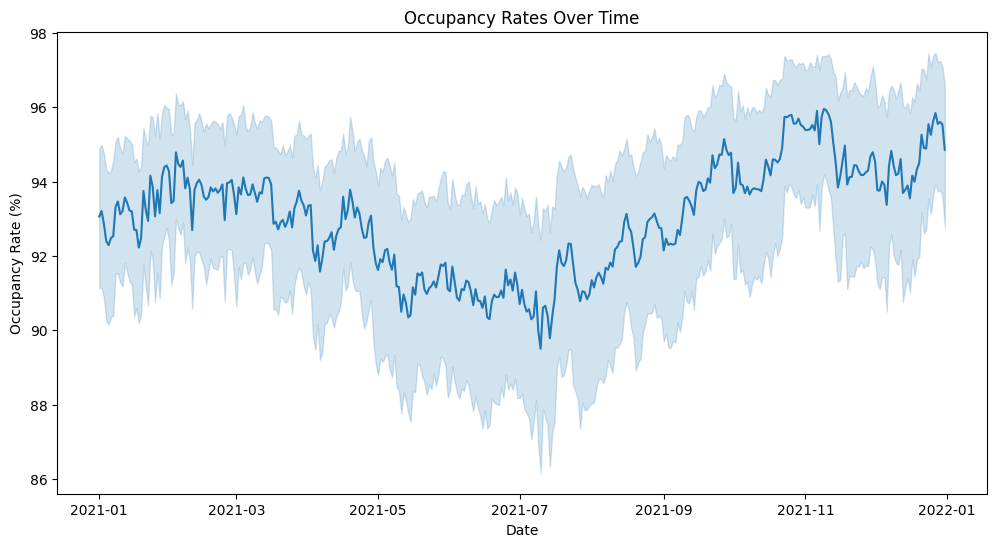

In [ ]:
#Conduct a time-series analysis, create a line plot of occupancy rates over time
#change the datatype to datatime datatype
A1_data['OCCUPANCY_DATE'] = pd.to_datetime(A1_data['OCCUPANCY_DATE'])
#Sort the data, which is cruicial for time-series analysis
data_sorted_by_date = A1_data.sort_values('OCCUPANCY_DATE')
#Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='OCCUPANCY_DATE', y='OCCUPANCY_RATE', data=A1_data)
plt.title('Occupancy Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Occupancy Rate (%)')
plt.show()

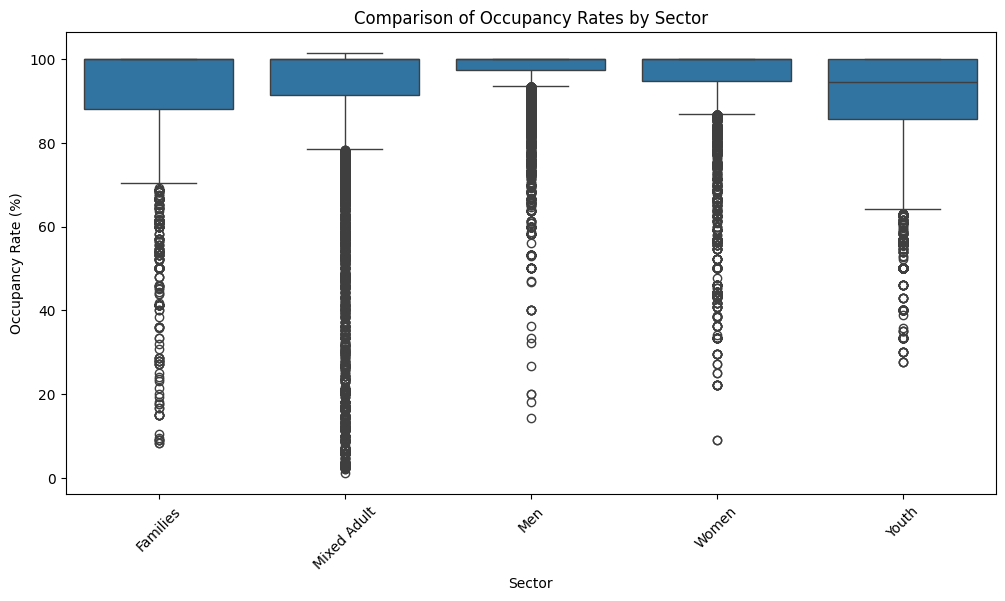

In [ ]:
#Create a boxplot for comparison of occupancy rates by sector
plt.figure(figsize=(12, 6))
sns.boxplot(x='SECTOR', y='OCCUPANCY_RATE', data=A1_data)
plt.title('Comparison of Occupancy Rates by Sector')
plt.xlabel('Sector')
plt.ylabel('Occupancy Rate (%)')
#rotates the x labels by 45 degrees for readability
plt.xticks(rotation=45)
plt.show()

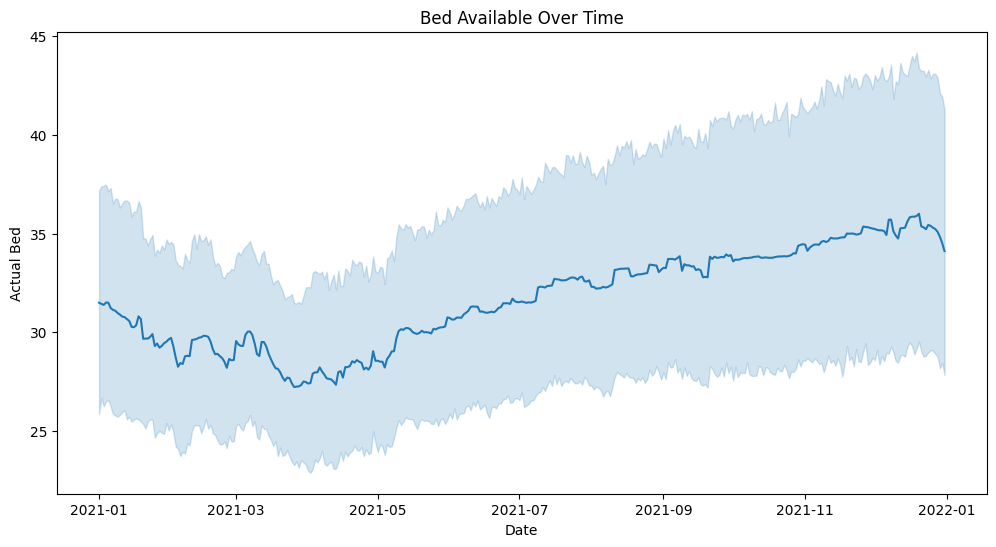

In [ ]:
#To have a reference, also create a time-series analysis for bed capacity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'OCCUPANCY_DATE', y = 'CAPACITY_ACTUAL_BED', data = bed_based_capacity_data)
plt.title('Bed Available Over Time')
plt.xlabel('Date')
plt.ylabel('Actual Bed')
plt.show()

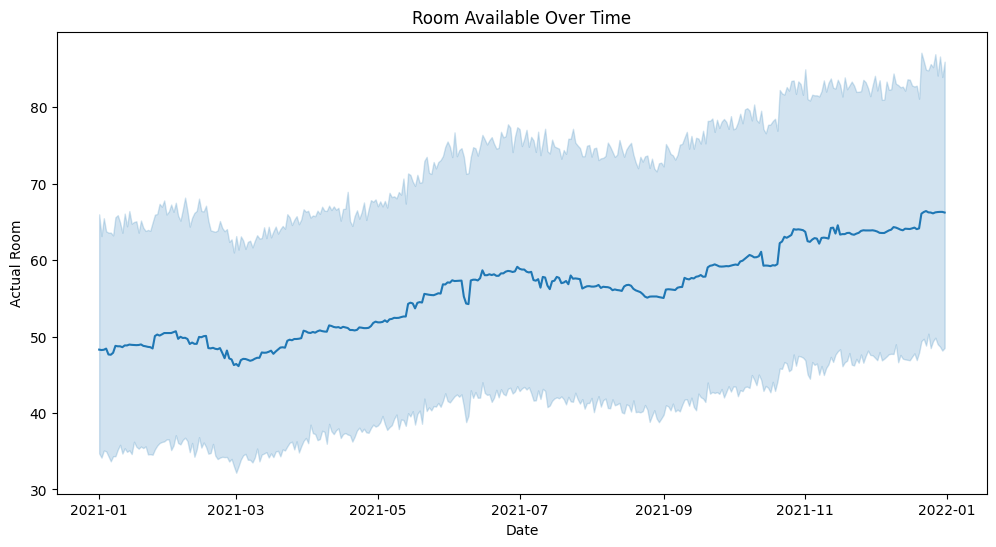

In [ ]:
#To have a reference, also create a time-series analysis for room capacity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x = 'OCCUPANCY_DATE', y = 'CAPACITY_ACTUAL_ROOM', data = room_based_capacity_data)
plt.title('Room Available Over Time')
plt.xlabel('Date')
plt.ylabel('Actual Room')
plt.show()

In [ ]:
# Conduct two-sample t test between two types of program models

#The first group of data is where program_model is transitional
x = A1_data[A1_data['PROGRAM_MODEL'] == 'Transitional']
#The second group of data is where program model is emergency
y = A1_data[A1_data['PROGRAM_MODEL'] == 'Emergency']
#Since I only care about the occupancy_rate, only display that column
x_occupancy_rate = pd.to_numeric(x['OCCUPANCY_RATE'])
y_occupancy_rate = pd.to_numeric(y['OCCUPANCY_RATE'])

#Using Scipy Package
t_stats, p_val = stats.ttest_ind(x_occupancy_rate, y_occupancy_rate)
print('T statistics = ' + str(t_stats))
print('P value = ' + str(p_val))

T statistics = -39.0749698065413
P value = 0.0


In [ ]:
# Keep doing the Welch's t-test
t_stats, p_val = stats.ttest_ind(x_occupancy_rate, y_occupancy_rate, equal_var = False)
print('T statistics = ' + str(t_stats))
print('P value = ' + str(p_val))

T statistics = -40.98111537219914
P value = 0.0
